In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('PropensityBlockModel_FINAL.csv')
df.head()

,Unnamed: 0,copy_index,GEOID_x,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,GEOID_y,Max,Sum,house_yr_pct_earlier_1939,house_pct_occupied,house_pct_family_married,race_pct_black,worked_past_12_mo,heat_pct_fueloil_kerosene,educ_bachelors,house_pct_live_alone,educ_some_col_no_grad,house_pct_ownd_occupied,house_w_home_equity_loan,house_val_175K_200K,house_val_200K_250K,True_Labels,Predicted_Labels,Predicted_Probs
0,0,0,27017070600,MN,977465236,10306005,377.401,3.979,46.600099,-92.882993,#_270170706003,1.508296,3.016591,0.259459,0.694595,0.513619,0.015060,0.619217,0.058366,0.071283,0.268482,0.197556,0.898833,0.038961,0.025974,0.086580,0,0,0.305971
1,1,1,26115831500,MI,4202063,64039,1.622,0.025,41.931336,-83.398945,#_261158315002,0.000000,0.000000,0.000000,0.878641,0.483425,0.004278,0.435175,0.000000,0.057007,0.334254,0.061758,0.762431,0.032609,0.047101,0.083333,0,0,0.128296
2,2,2,26139020900,MI,4699929,1325661,1.815,0.512,43.064721,-86.213325,#_261390209002,0.000000,0.000000,0.804455,0.727723,0.489796,0.000000,0.647368,0.000000,0.493827,0.370748,0.080247,0.782313,0.108696,0.030435,0.130435,0,0,0.384859
3,3,3,42011001600,PA,250449,0,0.097,0.000,40.340507,-75.913125,#_420110016001,1.486989,1.486989,0.420147,0.916462,0.402145,0.023792,0.743702,0.335121,0.060820,0.193029,0.073550,0.512064,0.036649,0.000000,0.000000,0,0,0.350192
4,4,4,20005081800,KS,35296180,780343,13.628,0.301,39.538223,-95.146912,#_200050818003,2.210759,3.684598,0.735808,0.930131,0.570423,0.023581,0.646445,0.000000,0.256098,0.260563,0.131707,0.734742,0.019169,0.000000,0.000000,0,0,0.340038


In [4]:
raw = pd.read_csv("PropensityBlockModel.csv")
raw.head()

,GEOID,Max,Sum,house_yr_pct_earlier_1939,house_pct_occupied,house_pct_family_married,race_pct_black,worked_past_12_mo,heat_pct_fueloil_kerosene,educ_bachelors,house_pct_live_alone,educ_some_col_no_grad,house_pct_ownd_occupied,house_w_home_equity_loan,house_val_175K_200K,house_val_200K_250K,True_Labels,Predicted_Labels,Predicted_Probs
0,#_270170706003,1.508296,3.016591,0.259459,0.694595,0.513619,0.015060,0.619217,0.058366,0.071283,0.268482,0.197556,0.898833,0.038961,0.025974,0.086580,0,0,0.305971
1,#_261158315002,0.000000,0.000000,0.000000,0.878641,0.483425,0.004278,0.435175,0.000000,0.057007,0.334254,0.061758,0.762431,0.032609,0.047101,0.083333,0,0,0.128296
2,#_261390209002,0.000000,0.000000,0.804455,0.727723,0.489796,0.000000,0.647368,0.000000,0.493827,0.370748,0.080247,0.782313,0.108696,0.030435,0.130435,0,0,0.384859
3,#_420110016001,1.486989,1.486989,0.420147,0.916462,0.402145,0.023792,0.743702,0.335121,0.060820,0.193029,0.073550,0.512064,0.036649,0.000000,0.000000,0,0,0.350192
4,#_200050818003,2.210759,3.684598,0.735808,0.930131,0.570423,0.023581,0.646445,0.000000,0.256098,0.260563,0.131707,0.734742,0.019169,0.000000,0.000000,0,0,0.340038


In [5]:
raw['copy_index'] = raw.index
raw

,GEOID,Max,Sum,house_yr_pct_earlier_1939,house_pct_occupied,house_pct_family_married,race_pct_black,worked_past_12_mo,heat_pct_fueloil_kerosene,educ_bachelors,house_pct_live_alone,educ_some_col_no_grad,house_pct_ownd_occupied,house_w_home_equity_loan,house_val_175K_200K,house_val_200K_250K,True_Labels,Predicted_Labels,Predicted_Probs,copy_index
0,#_270170706003,1.508296,3.016591,0.259459,0.694595,0.513619,0.015060,0.619217,0.058366,0.071283,0.268482,0.197556,0.898833,0.038961,0.025974,0.086580,0,0,0.305971,0
1,#_261158315002,0.000000,0.000000,0.000000,0.878641,0.483425,0.004278,0.435175,0.000000,0.057007,0.334254,0.061758,0.762431,0.032609,0.047101,0.083333,0,0,0.128296,1
2,#_261390209002,0.000000,0.000000,0.804455,0.727723,0.489796,0.000000,0.647368,0.000000,0.493827,0.370748,0.080247,0.782313,0.108696,0.030435,0.130435,0,0,0.384859,2
3,#_420110016001,1.486989,1.486989,0.420147,0.916462,0.402145,0.023792,0.743702,0.335121,0.060820,0.193029,0.073550,0.512064,0.036649,0.000000,0.000000,0,0,0.350192,3
4,#_200050818003,2.210759,3.684598,0.735808,0.930131,0.570423,0.023581,0.646445,0.000000,0.256098,0.260563,0.131707,0.734742,0.019169,0.000000,0.000000,0,0,0.340038,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134503,#_110010050011,0.000000,0.000000,0.593137,0.926471,0.351852,0.070358,0.961735,0.000000,0.382843,0.365079,0.025608,0.497354,0.015957,0.000000,0.000000,0,0,0.000000,134503
134504,#_110010068041,0.000000,0.000000,0.851852,1.000000,0.296296,0.865349,0.487495,0.000000,0.037674,0.148148,0.116279,1.000000,0.148148,0.000000,0.000000,0,0,0.000000,134504
134505,#_110010070001,0.000000,0.000000,0.551389,0.948611,0.370425,0.078049,0.899194,0.000000,0.386930,0.387994,0.016337,0.522694,0.274510,0.000000,0.000000,0,0,0.000000,134505
134506,#_110010081003,0.000000,0.000000,0.895787,0.793792,0.455307,0.067775,0.751037,0.019553,0.431988,0.284916,0.017937,0.463687,0.156627,0.000000,0.000000,0,0,0.000000,134506


In [6]:
#df = df[['copy_index','USPS','INTPTLAT','INTPTLONG']]
#df[:5]

In [7]:
from shapely.geometry import Polygon

source: https://www.youtube.com/watch?v=aVkdWSqKG_c

In [8]:
#polygon_geom = Polygon(zip(df['INTPTLONG'], df['INTPTLAT']))

In [9]:
points = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['INTPTLONG'], df['INTPTLAT'])
                         )

<AxesSubplot:>

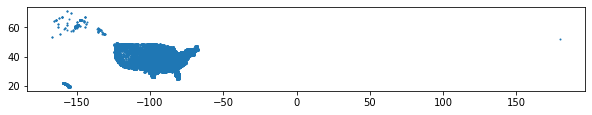

In [10]:
points.plot(markersize = 1, figsize = (10, 10))

source: https://gis.stackexchange.com/questions/294206/create-a-polygon-from-coordinates-in-geopandas-with-python

In [11]:
from shapely.geometry import Point, LineString, Polygon
import numpy as np

## AL

In [12]:
al_df = df.loc[df['USPS']== 'AL']
al_df[:5]

,Unnamed: 0,copy_index,GEOID_x,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,GEOID_y,Max,Sum,house_yr_pct_earlier_1939,house_pct_occupied,house_pct_family_married,race_pct_black,worked_past_12_mo,heat_pct_fueloil_kerosene,educ_bachelors,house_pct_live_alone,educ_some_col_no_grad,house_pct_ownd_occupied,house_w_home_equity_loan,house_val_175K_200K,house_val_200K_250K,True_Labels,Predicted_Labels,Predicted_Probs,geometry
137,137,137,1073011704,AL,66974062,167399,25.859,0.065,33.724382,-86.848731,#_010730117042,0.919963,0.919963,0.016327,0.846939,0.619277,0.007360,0.737473,0.0,0.096946,0.238554,0.127490,0.963855,0.067500,0.120000,0.187500,0,0,0.131539,POINT (-86.84873 33.72438)
158,158,158,1133965700,AL,73808765,301632,28.498,0.116,34.274337,-87.572300,#_011339657001,1.949318,3.898635,0.000000,1.000000,0.358423,0.000000,0.681529,0.0,0.116223,0.612903,0.193705,0.824373,0.000000,0.000000,0.173913,0,0,0.374722,POINT (-87.57230 34.27434)
235,235,235,1099075900,AL,267832792,5094852,103.411,1.967,31.531540,-87.468275,#_010990759003,1.910220,4.775549,0.000000,0.815013,0.302632,0.825818,0.161644,0.0,0.076220,0.296053,0.062500,0.506579,0.000000,0.000000,0.000000,0,1,0.670125,POINT (-87.46827 31.53154)
367,367,367,1083020900,AL,15829770,259930,6.112,0.100,34.788773,-86.950164,#_010830209001,0.339789,0.679579,0.013834,0.974308,0.631846,0.106694,0.616621,0.0,0.291567,0.213996,0.096236,0.654158,0.060465,0.139535,0.162791,0,0,0.033538,POINT (-86.95016 34.78877)
524,524,524,1115040204,AL,47375624,5690122,18.292,2.197,33.564402,-86.240496,#_011150402042,0.441891,0.883783,0.000000,0.860417,0.647700,0.203712,0.694719,0.0,0.140420,0.127119,0.169291,0.934625,0.041451,0.040155,0.224093,0,0,0.021943,POINT (-86.24050 33.56440)


In [13]:
al = gpd.read_file("tl_2019_01_tract/tl_2019_01_tract.shp")
al

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,055,010700,01055010700,107,Census Tract 107,G5020,S,87404337,2927199,+34.0726595,-085.8991944,"POLYGON ((-85.98699 34.04413, -85.98606 34.045..."
1,01,055,001300,01055001300,13,Census Tract 13,G5020,S,5083957,836213,+34.0078782,-085.9865947,"POLYGON ((-86.00068 34.00537, -86.00023 34.006..."
2,01,055,000900,01055000900,9,Census Tract 9,G5020,S,11932347,740907,+34.0003469,-086.0427603,"POLYGON ((-86.07079 34.00011, -86.07076 34.000..."
3,01,055,001700,01055001700,17,Census Tract 17,G5020,S,9118882,0,+33.9825311,-085.9518384,"POLYGON ((-85.96885 33.98825, -85.96884 33.988..."
4,01,055,010501,01055010501,105.01,Census Tract 105.01,G5020,S,50209675,7198559,+33.8992688,-086.0295803,"POLYGON ((-86.07352 33.90549, -86.07337 33.906..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,01,077,011101,01077011101,111.01,Census Tract 111.01,G5020,S,20677198,136812,+34.8645327,-087.7119240,"POLYGON ((-87.72427 34.84033, -87.72418 34.840..."
1177,01,077,011802,01077011802,118.02,Census Tract 118.02,G5020,S,76289034,23136933,+34.8122679,-087.3043693,"POLYGON ((-87.37680 34.81320, -87.37664 34.814..."
1178,01,077,011603,01077011603,116.03,Census Tract 116.03,G5020,S,69051811,1895283,+34.9038867,-087.5229137,"POLYGON ((-87.61041 34.91473, -87.61028 34.915..."
1179,01,119,011400,01119011400,114,Census Tract 114,G5020,S,535928893,10990231,+32.8638806,-088.2623266,"POLYGON ((-88.36858 32.74601, -88.36831 32.747..."


In [15]:
al

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,055,010700,01055010700,107,Census Tract 107,G5020,S,87404337,2927199,+34.0726595,-085.8991944,"POLYGON ((-85.98699 34.04413, -85.98606 34.045..."
1,01,055,001300,01055001300,13,Census Tract 13,G5020,S,5083957,836213,+34.0078782,-085.9865947,"POLYGON ((-86.00068 34.00537, -86.00023 34.006..."
2,01,055,000900,01055000900,9,Census Tract 9,G5020,S,11932347,740907,+34.0003469,-086.0427603,"POLYGON ((-86.07079 34.00011, -86.07076 34.000..."
3,01,055,001700,01055001700,17,Census Tract 17,G5020,S,9118882,0,+33.9825311,-085.9518384,"POLYGON ((-85.96885 33.98825, -85.96884 33.988..."
4,01,055,010501,01055010501,105.01,Census Tract 105.01,G5020,S,50209675,7198559,+33.8992688,-086.0295803,"POLYGON ((-86.07352 33.90549, -86.07337 33.906..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,01,077,011101,01077011101,111.01,Census Tract 111.01,G5020,S,20677198,136812,+34.8645327,-087.7119240,"POLYGON ((-87.72427 34.84033, -87.72418 34.840..."
1177,01,077,011802,01077011802,118.02,Census Tract 118.02,G5020,S,76289034,23136933,+34.8122679,-087.3043693,"POLYGON ((-87.37680 34.81320, -87.37664 34.814..."
1178,01,077,011603,01077011603,116.03,Census Tract 116.03,G5020,S,69051811,1895283,+34.9038867,-087.5229137,"POLYGON ((-87.61041 34.91473, -87.61028 34.915..."
1179,01,119,011400,01119011400,114,Census Tract 114,G5020,S,535928893,10990231,+32.8638806,-088.2623266,"POLYGON ((-88.36858 32.74601, -88.36831 32.747..."


In [ ]:
#al_df.join(al, on=GEOID, how='inner', sort=False)